In [36]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install --upgrade keras

  Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [38]:
pip install tensorflow

  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
Note: you may need to restart the kernel to use updated packages.


In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

import os
import cv2

import matplotlib.pyplot as plt

In [40]:
def extract_label(img_path,train = True):
    filename, _ = os.path.splitext(os.path.basename(img_path))

    subject_id, etc = filename.split('__')

    if train:
      gender = etc[0]
    else:
      gender = etc[0]

    gender = 0 if gender == 'M' else 1
    return np.array([gender], dtype=np.uint16)

In [41]:
img_size = 96


def loading_data(path,boolean):
    data = []
    for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            img_resize = cv2.resize(img_array, (img_size, img_size))
            label = extract_label(os.path.join(path, img),boolean)
            
            data.append([label[0], img_resize ])
            if len(data) % 1000 == 0:
                print(len(data))
    return data

In [60]:
Real_path = r"C:\Users\SAI\Downloads\archive (3)\SOCOFing\Real"
Easy_path = r"C:\Users\SAI\Downloads\archive (3)\SOCOFing\Altered\Altered-Easy"
Medium_path = r"C:\Users\SAI\Downloads\archive (3)\SOCOFing\Altered\Altered-Medium"
Hard_path = r"C:\Users\SAI\Downloads\archive (3)\SOCOFing\Altered\Altered-Hard"
Easy_data = loading_data(Hard_path,True)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000


In [61]:
img, labels = [], []
for label, feature in Easy_data:
    labels.append(label)
    img.append(feature)

In [62]:
train_data = np.array(img).reshape(-1, img_size, img_size, 1)
train_data = train_data / 255.0

In [63]:
from keras.utils import to_categorical
train_labels = to_categorical(labels, num_classes = 2)

In [64]:
labels = np.array(labels)

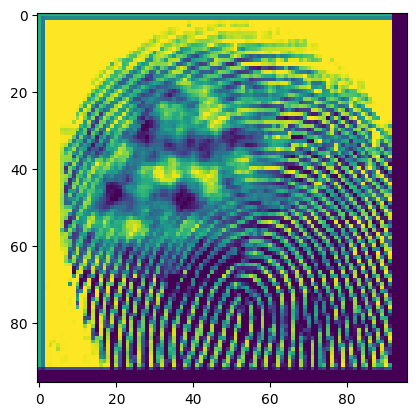

In [65]:
plt.imshow(train_data[5000])

In [66]:
import tensorflow.keras as keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, #BatchNormalization, Dropout
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = Sequential([
Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_uniform', input_shape = [96, 96, 1]),
MaxPooling2D(2),
Conv2D(32, 3, padding='same', kernel_initializer='he_uniform', activation='relu'),
MaxPooling2D(2),
Flatten(),
Dense(128, kernel_initializer='he_uniform',activation = 'relu'),
Dense(1, activation = 'sigmoid'),
])
model.summary()


model.compile(optimizer = optimizers.Adam(1e-3), loss = 'binary_crossentropy', metrics = ['accuracy'])
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 96, 96, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 18432)             0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [67]:
type(labels)

numpy.ndarray

In [68]:
# Counting the number of males and females
num_males = sum(1 for label in labels if label == 0)
num_females = sum(1 for label in labels if label == 1)

print("Number of males:", num_males)
print("Number of females:", num_females)


Number of males: 11650
Number of females: 3549


In [69]:
history = model.fit(train_data, labels, batch_size = 128, epochs = 50, 
          validation_split = 0.2, callbacks = [early_stopping_cb], verbose = 1)

Epoch 1/50
95/95 [==============================] - 33s 339ms/step - loss: 0.9078 - accuracy: 0.7432 - val_loss: 0.5169 - val_accuracy: 0.7533
Epoch 2/50
95/95 [==============================] - 26s 277ms/step - loss: 0.4751 - accuracy: 0.7841 - val_loss: 0.5002 - val_accuracy: 0.7727
Epoch 3/50
95/95 [==============================] - 26s 271ms/step - loss: 0.4332 - accuracy: 0.8040 - val_loss: 0.5031 - val_accuracy: 0.7714
Epoch 4/50
95/95 [==============================] - 25s 265ms/step - loss: 0.3748 - accuracy: 0.8379 - val_loss: 0.5184 - val_accuracy: 0.7618
Epoch 5/50
95/95 [==============================] - 25s 264ms/step - loss: 0.3101 - accuracy: 0.8674 - val_loss: 0.5940 - val_accuracy: 0.7168
Epoch 6/50
95/95 [==============================] - 25s 266ms/step - loss: 0.2479 - accuracy: 0.8997 - val_loss: 0.6373 - val_accuracy: 0.7530
Epoch 7/50
95/95 [==============================] - 25s 265ms/step - loss: 0.1791 - accuracy: 0.9336 - val_loss: 0.6943 - val_accuracy: 0.7477

In [70]:
test_data = loading_data(Real_path,False)

x_test,y_test= [], []
for label, feature in test_data:
    y_test.append(label)
    x_test.append(feature)

1000
2000
3000
4000
5000
6000


In [71]:
x_test = np.array(x_test).reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)
type(y_test)

numpy.ndarray

In [72]:
model.evaluate(x_test,y_test)

188/188 [==============================] - 4s 19ms/step - loss: 59.5428 - accuracy: 0.9227


[59.54275894165039, 0.9226666688919067]

In [73]:
model.save('GenderFP.h5')

In [74]:
def preprocess_image(image_path):
    img_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image
    img_resize = cv2.resize(img_array, (img_size, img_size))  # Resize to the required dimensions
    img_resize = img_resize.reshape(-1, img_size, img_size, 1)  # Reshape for model input
    img_resize = img_resize / 255.0  # Normalize the image
    return img_resize

# Load the model
model = tf.keras.models.load_model('GenderFP.h5')

# Path to the image you want to test
test_image_path = r'C:\Users\SAI\Desktop\p2.jpg'

# Preprocess the image
test_image = preprocess_image(test_image_path)

# Make predictions
prediction = model.predict(test_image)

# Print the prediction
print(prediction)

if prediction >= 0.5:
    print("The image is predicted to be female.")
else:
    print("The image is predicted to be male.")

1/1 [==============================] - 0s 63ms/step
[[0.19032152]]
The image is predicted to be male.
